In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
import pandas as pd
import os

print(os.getcwd())
# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Export the combined DataFrame to a CSV file
data.to_csv('heart_disease_data.csv', index=False)

/Users/jalen/Documents/code/24Fall_CSCI6806_Group10/eda


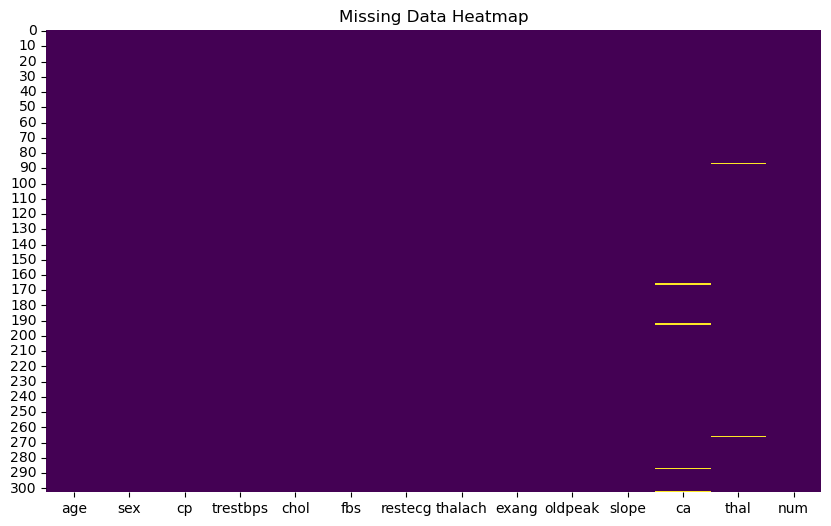

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization: Missing Data Heatmap
plt.figure(figsize=(10, 6))
# visualizing missing values can give you a clearer picture of the distribution of missing data.
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## looking at the distribution based on other categorical variables, like sex or chest pain type.

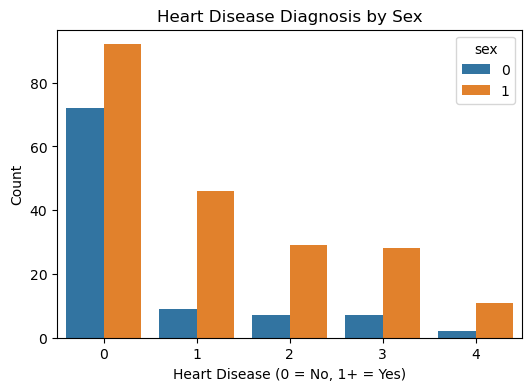

In [8]:
# Distribution of Heart Disease Diagnosis by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='num', hue='sex', data=data)
plt.title('Heart Disease Diagnosis by Sex')
plt.xlabel('Heart Disease (0 = No, 1+ = Yes)')
plt.ylabel('Count')
plt.show()


## use Seaborn’s FacetGrid to visualize distributions of continuous variables across categories (like chest pain type, sex, etc.) 

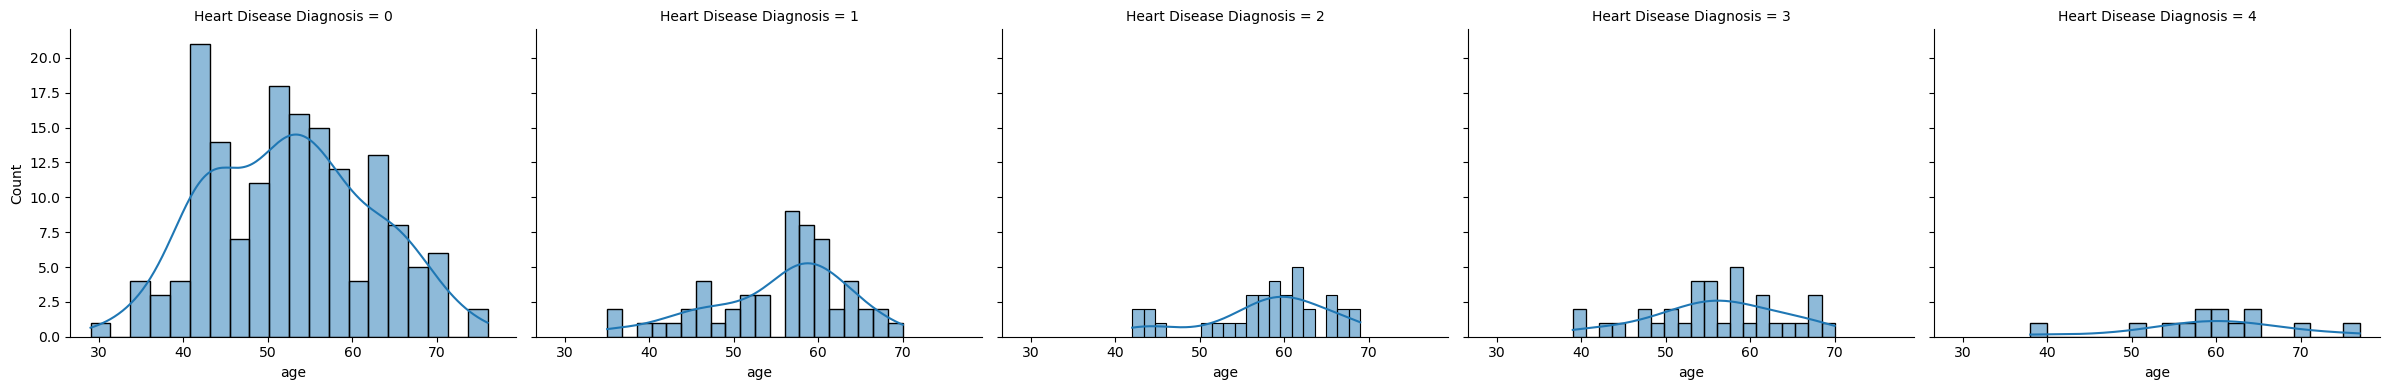

In [9]:
# FacetGrid: Distribution of Age by Heart Disease Diagnosis
g = sns.FacetGrid(data, col="num", height=4, aspect=1.2)
g.map(sns.histplot, "age", bins=20, kde=True)
g.set_titles("Heart Disease Diagnosis = {col_name}")
plt.show()

## use violin plots for a better sense of the distribution and density.

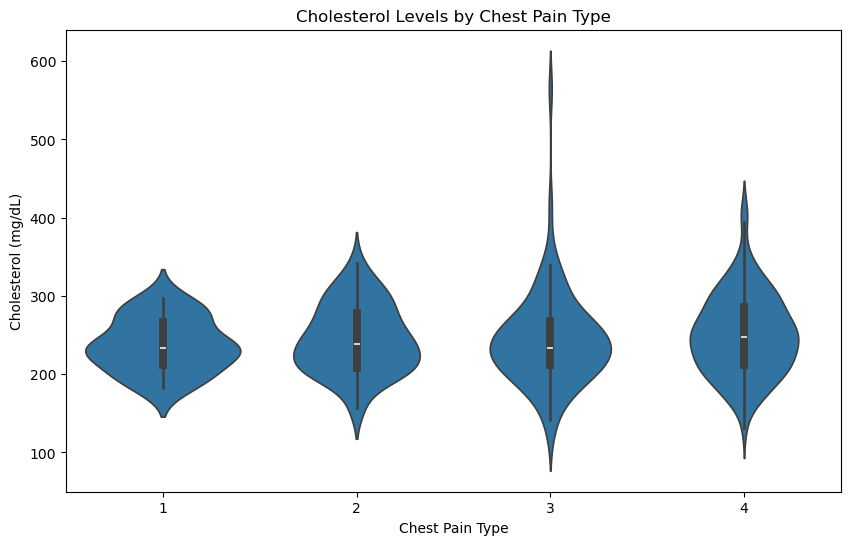

In [10]:
# Violinplot: Cholesterol Levels by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='chol', data=data)
plt.title('Cholesterol Levels by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()


## limit to key features

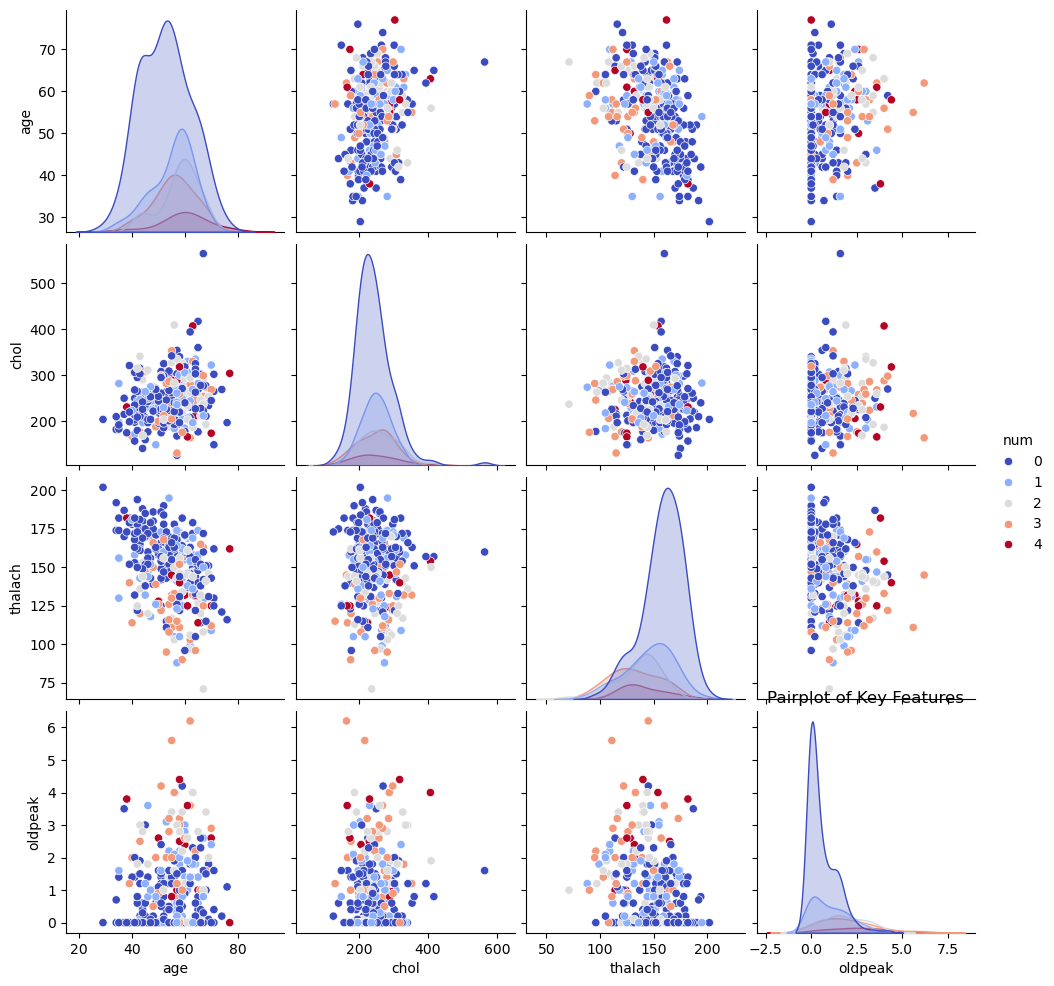

In [11]:
# Pairplot: Relationships between key features, colored by target variable
sns.pairplot(data[['age', 'chol', 'thalach', 'oldpeak', 'num']], hue='num', palette='coolwarm')
plt.title('Pairplot of Key Features')
plt.show()


 # look at the point biserial correlation or Chi-square test to determine how categorical features relate to the target variable.

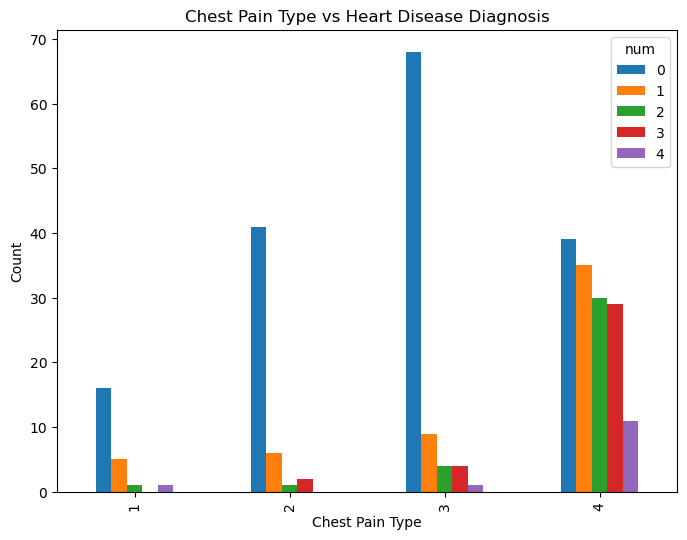

In [12]:
# Crosstab for Categorical Variables
pd.crosstab(data['cp'], data['num']).plot(kind='bar', figsize=(8, 6))
plt.title('Chest Pain Type vs Heart Disease Diagnosis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


## Kernel Density Estimate (KDE) plots can show the distribution of continuous variables more smoothly, especially useful when comparing multiple classes.

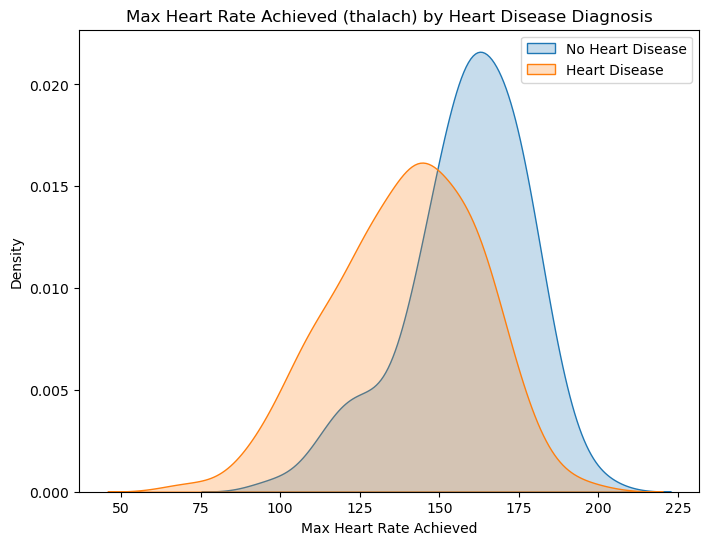

In [14]:
# KDE Plot: Max Heart Rate Achieved (thalach) by Heart Disease Diagnosis
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['num'] == 0]['thalach'], label='No Heart Disease', fill=True)
sns.kdeplot(data[data['num'] > 0]['thalach'], label='Heart Disease', fill=True)
plt.title('Max Heart Rate Achieved (thalach) by Heart Disease Diagnosis')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Density')
plt.legend()
plt.show()


## highlight the correlation of each feature with the target variable 

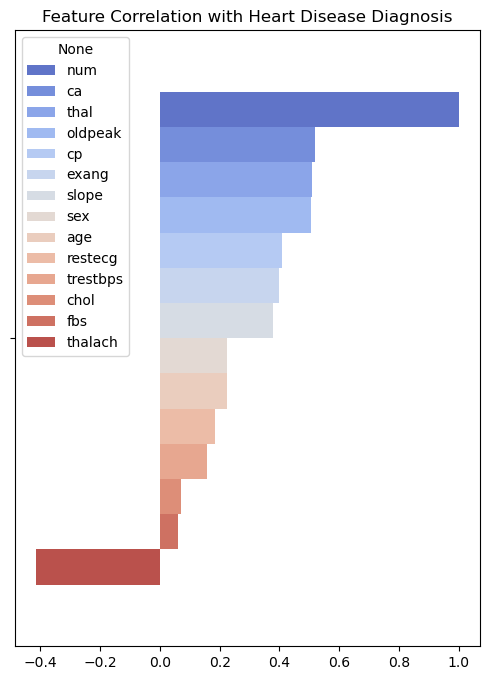

In [18]:
# Correlation of Features with Target (Heart Disease Diagnosis)
corr_with_target = data.corr()['num'].sort_values(ascending=False)
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_with_target.values, hue=corr_with_target.index, palette='coolwarm')
plt.title('Feature Correlation with Heart Disease Diagnosis')
plt.show()


# Heatmap with Annotated Percentages for Categorical Features，using percentages can provide more insights than just counts.

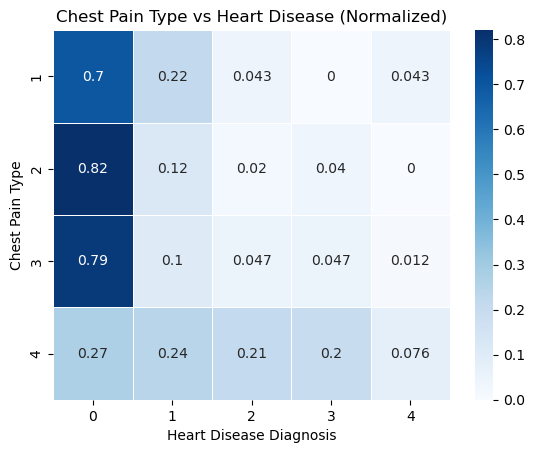

In [19]:
# Heatmap: Chest Pain Type vs. Heart Disease Diagnosis (Normalized)
cp_heart_disease = pd.crosstab(data['cp'], data['num'], normalize='index')
sns.heatmap(cp_heart_disease, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Chest Pain Type vs Heart Disease (Normalized)')
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Chest Pain Type')
plt.show()


In [20]:
# Skewness of Continuous Features
print(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].skew())


age        -0.209060
trestbps    0.706035
chol        1.135503
thalach    -0.537449
oldpeak     1.269720
dtype: float64
